In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Histogram of LLR distribution in KO and WT dataset')

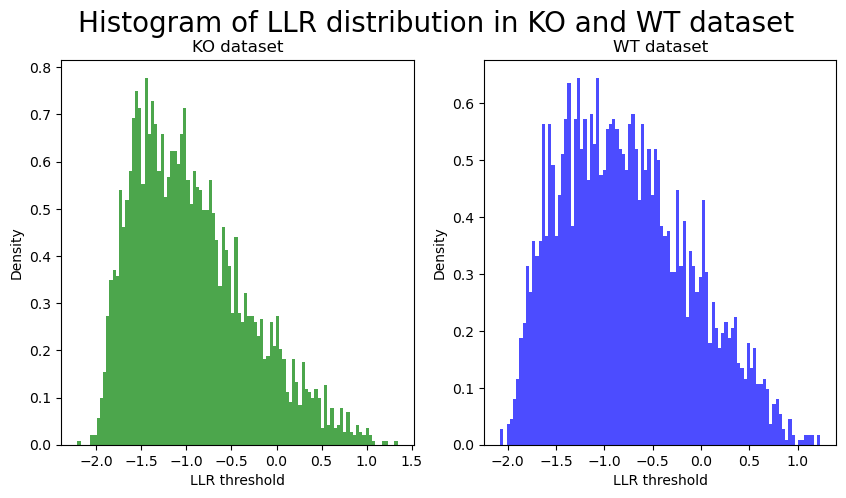

In [2]:
# Period 24
KO = pd.read_csv('./06_XBP1_result/KO/GP_result_KO.csv') 
KO = KO.iloc[:,1:]
KO_supp = pd.read_csv('./06_XBP1_result/KO/GP_result_KO_supp.csv')
KO_supp = KO_supp.iloc[:,1:]
KO = pd.concat([KO,KO_supp], axis=0, ignore_index = True)


WT = pd.read_csv('./06_XBP1_result/WT/GP_result_WT.csv') 
WT = WT.iloc[:,1:]
WT_supp = pd.read_csv('./06_XBP1_result/WT/GP_result_WT_supp.csv')
WT_supp = WT_supp.iloc[:,1:]
WT = pd.concat([WT,WT_supp], axis=0, ignore_index = True)

xbp = [KO,WT]
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 24)])


num_bins = 100

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#circadian_2[0].hist(column='LLR')
n, bins, patches = plt.hist(circadian_2[0]['LLR'], num_bins,density = 1,color ='green',alpha = 0.7)
plt.xlabel("LLR threshold")
plt.ylabel("Density")
plt.title("KO dataset")

plt.subplot(1, 2, 2)
#circadian_2[1].hist(column='LLR')
n, bins, patches = plt.hist(circadian_2[1]['LLR'], num_bins,density = 1,color ='blue',alpha = 0.7)
plt.xlabel("LLR threshold")
plt.ylabel("Density")
plt.title("WT dataset")

plt.suptitle("Histogram of LLR distribution in KO and WT dataset",fontsize=20)

#plt.savefig("New_LLR_distribution.png")

In [23]:
JTK_WT = pd.read_csv('./JTK_results/JTK_WT.csv')
JTK_WT = JTK_WT.iloc[:,1:]
JTK_WT_supp = pd.read_csv('./JTK_results/JTK_WT_supp.csv')
JTK_WT_supp = JTK_WT_supp.iloc[:,1:]
JTK_WT = pd.concat([JTK_WT,JTK_WT_supp], axis=0, ignore_index = True)


JTK_KO = pd.read_csv('./JTK_results/JTK_KO.csv')
JTK_KO = JTK_KO.iloc[:,1:]
JTK_KO_supp = pd.read_csv('./JTK_results/JTK_KO_supp.csv')
JTK_KO_supp = JTK_KO_supp.iloc[:,1:]
JTK_KO = pd.concat([JTK_KO,JTK_KO_supp], axis=0, ignore_index = True)

In [24]:
RAIN_WT = pd.read_csv('./RAIN_results/RAIN_WT.csv')
RAIN_WT_supp = pd.read_csv('./RAIN_results/RAIN_WT_supp.csv')
RAIN_WT = pd.concat([RAIN_WT,RAIN_WT_supp], axis=0, ignore_index = True)

RAIN_KO = pd.read_csv('./RAIN_results/RAIN_KO.csv')
RAIN_KO_supp = pd.read_csv('./RAIN_results/RAIN_KO_supp.csv')
RAIN_KO = pd.concat([RAIN_KO,RAIN_KO_supp], axis=0, ignore_index = True)

-1.717089017232259
-1.25939146677653


Text(0.5, 1.0, 'LLR vs pvalues in KO')

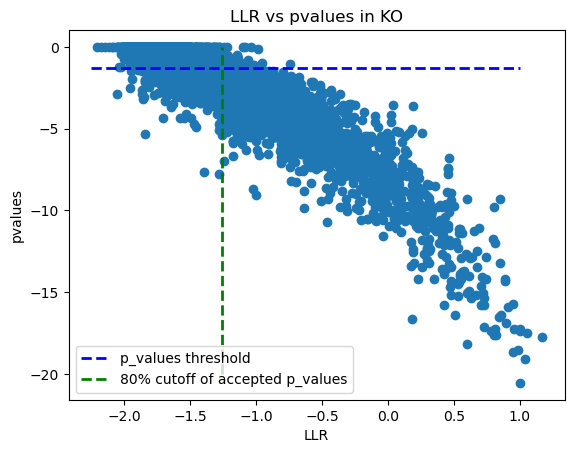

In [9]:
llr = sorted(KO['LLR'], reverse = True) 
thres_x = llr[round(len(llr)/100*80)]
refine = JTK_KO[JTK_KO['ADJ.P'] < 0.05]
llr_2 = sorted(KO['LLR'][refine.index.values], reverse = True)
thres_x_2 = llr[round(len(llr_2)/100*80)]

print(thres_x)
print(thres_x_2)

plt.scatter(x = KO['LLR'], y = np.log10(JTK_KO['ADJ.P']))
plt.hlines(y= np.log10(0.05), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2, label = 'p_values threshold')
#plt.vlines(x= thres_x, ymin=-20, ymax=0, colors='r', linestyles='--', lw=2, label = 'p_values threshold')
plt.vlines(x= thres_x_2, ymin=-20, ymax=0, colors='g', linestyles='--', lw=2, label = '80% cutoff of accepted p_values')
plt.legend()
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in KO')

-1.717089017232259
-1.4450407028198242


Text(0.5, 1.0, 'LLR vs pVal in KO')

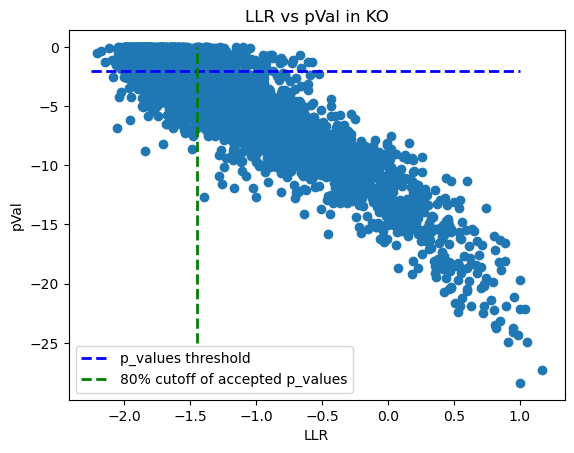

In [10]:
llr = sorted(KO['LLR'], reverse = True) 
thres_x = llr[round(len(llr)/100*80)]
refine = RAIN_KO[RAIN_KO['pVal'] < 0.01]
llr_2 = sorted(KO['LLR'][refine.index.values], reverse = True)
thres_x_2 = llr[round(len(llr_2)/100*80)]

print(thres_x)
print(thres_x_2)
plt.scatter(x = KO['LLR'], y = np.log10(RAIN_KO['pVal']))
plt.hlines(y= np.log10(0.01), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2,label = 'p_values threshold')
#plt.vlines(x= thres_x, ymin=-60, ymax=0, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x_2, ymin=-25, ymax=0, colors='g', linestyles='--', lw=2,label = '80% cutoff of accepted p_values')
plt.legend()
plt.xlabel('LLR')
plt.ylabel('pVal')
plt.title('LLR vs pVal in KO')

In [26]:
llr_KO = sorted(KO['LLR'], reverse = True) 
llr_WT = sorted(WT['LLR'], reverse = True) 

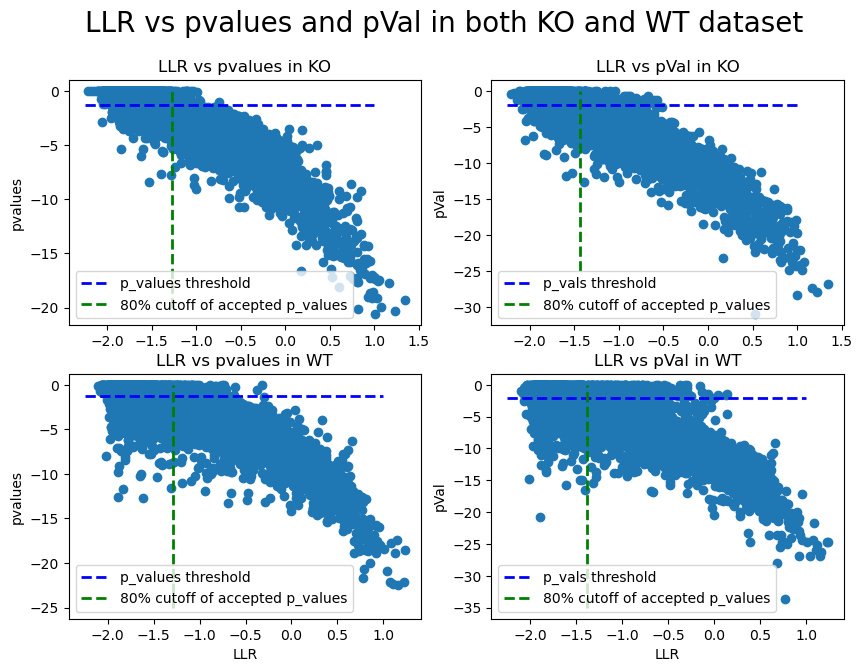

In [28]:
# Combine all cases
refine = JTK_KO[JTK_KO['ADJ.P'] < 0.05]
llr_2 = sorted(KO['LLR'][refine.index.values], reverse = True)
thres_x_1 = llr_KO[round(len(llr_2)/100*80)]

refine = RAIN_KO[RAIN_KO['pVal'] < 0.01]
llr_2 = sorted(KO['LLR'][refine.index.values], reverse = True)
thres_x_2 = llr_KO[round(len(llr_2)/100*80)]

refine = JTK_WT[JTK_WT['ADJ.P'] < 0.05]
llr_2 = sorted(WT['LLR'][refine.index.values], reverse = True)
thres_x_3 = llr_WT[round(len(llr_2)/100*80)]

refine = RAIN_WT[RAIN_WT['pVal'] < 0.01]
llr_2 = sorted(WT['LLR'][refine.index.values], reverse = True)
thres_x_4 = llr_WT[round(len(llr_2)/100*80)]



plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
plt.scatter(x = KO['LLR'], y = np.log10(JTK_KO['ADJ.P']))
plt.hlines(y= np.log10(0.05), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2, label = 'p_values threshold')
#plt.vlines(x= thres_x, ymin=-20, ymax=0, colors='r', linestyles='--', lw=2, label = 'p_values threshold')
plt.vlines(x= thres_x_1, ymin=-20, ymax=0, colors='g', linestyles='--', lw=2, label = '80% cutoff of accepted p_values')
plt.legend()
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in KO')


plt.subplot(2, 2, 2)
plt.scatter(x = KO['LLR'], y = np.log10(RAIN_KO['pVal']))
plt.hlines(y= np.log10(0.01), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2,label = 'p_vals threshold')
#plt.vlines(x= thres_x, ymin=-60, ymax=0, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x_2, ymin=-25, ymax=0, colors='g', linestyles='--', lw=2,label = '80% cutoff of accepted p_values')
plt.legend()
plt.ylabel('pVal')
plt.title('LLR vs pVal in KO')

plt.subplot(2, 2, 3)
plt.scatter(x = WT['LLR'], y = np.log10(JTK_WT['ADJ.P']))
plt.hlines(y= np.log10(0.05), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2, label = 'p_values threshold')
plt.vlines(x= thres_x_3, ymin=-25, ymax=0, colors='g', linestyles='--', lw=2, label = '80% cutoff of accepted p_values')
plt.legend()
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in WT')

plt.subplot(2, 2, 4)
plt.scatter(x = WT['LLR'], y = np.log10(RAIN_WT['pVal']))
plt.hlines(y= np.log10(0.01), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2,label = 'p_vals threshold')
plt.vlines(x= thres_x_4, ymin=-35, ymax=0, colors='g', linestyles='--', lw=2,label = '80% cutoff of accepted p_values')
plt.legend()
plt.xlabel('LLR')
plt.ylabel('pVal')
plt.title('LLR vs pVal in WT')

plt.suptitle("LLR vs pvalues and pVal in both KO and WT dataset",fontsize=20)

plt.savefig("New_LLR_relations.png")

-1.6583908398946126
-1.3440462748209636


Text(0.5, 1.0, 'LLR vs pVal in WT')

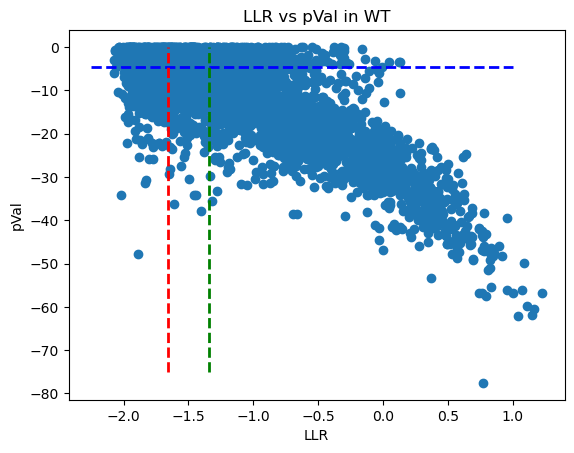

In [12]:
llr = sorted(WT['LLR'], reverse = True) 
thres_x = llr[round(len(llr)/100*80)]
refine = RAIN_WT[RAIN_WT['pVal'] < 0.01]
llr_2 = sorted(WT['LLR'][refine.index.values], reverse = True)
thres_x_2 = llr[round(len(llr_2)/100*80)]

print(thres_x)
print(thres_x_2)
plt.scatter(x = WT['LLR'], y = np.log(RAIN_WT['pVal']))
plt.hlines(y= np.log(0.01), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-75, ymax=0, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x_2, ymin=-75, ymax=0, colors='g', linestyles='--', lw=2)

plt.xlabel('LLR')
plt.ylabel('pVal')
plt.title('LLR vs pVal in WT')

-1.3660812377929688
-4.727255301950393


Text(0.5, 1.0, 'LLR vs pvalues in WT')

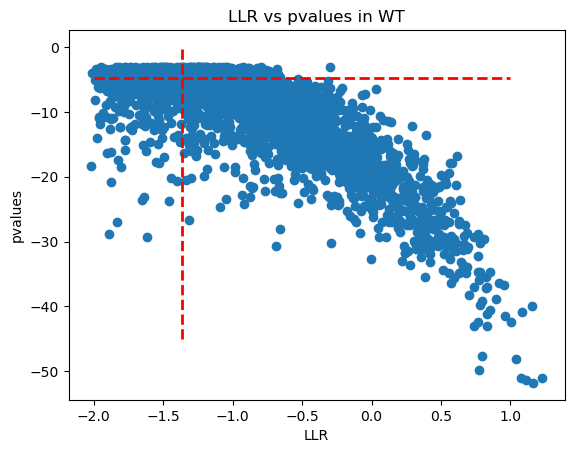

In [13]:
refine = JTK_WT[JTK_WT['ADJ.P'] < 0.05]
llr = sorted(WT['LLR'][refine.index.values], reverse = True)
thres_x = llr[round(len(llr)/100*80)]
pval = sorted(refine['ADJ.P'], reverse = False)
thres_y = pval[round(len(pval)/100*80)] 

print(thres_x)
print(np.log(thres_y))

plt.scatter(x = WT['LLR'][refine.index.values], y = np.log(refine['ADJ.P']))
plt.hlines(y= np.log(thres_y), xmin=-2, xmax=1, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-45, ymax=0, colors='r', linestyles='--', lw=2)
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in WT')

-1.6583908398946126
-1.2789891560872395


Text(0.5, 1.0, 'LLR vs pvalues in WT')

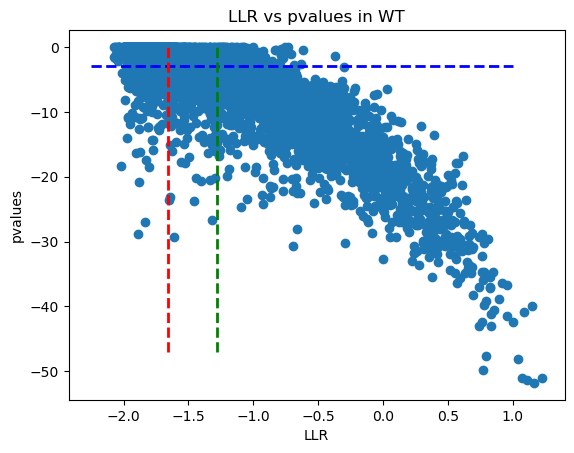

In [14]:
llr = sorted(WT['LLR'], reverse = True) 
thres_x = llr[round(len(llr)/100*80)]
refine = JTK_WT[JTK_WT['ADJ.P'] < 0.05]
llr_2 = sorted(WT['LLR'][refine.index.values], reverse = True)
thres_x_2 = llr[round(len(llr_2)/100*80)]

print(thres_x)
print(thres_x_2)

plt.scatter(x = WT['LLR'], y = np.log(JTK_WT['ADJ.P']))
plt.hlines(y= np.log(0.05), xmin=-2.25, xmax=1, colors='b', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-47, ymax=0, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x_2, ymin=-47, ymax=0, colors='g', linestyles='--', lw=2)

plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in WT')

In [15]:
# Outlier fom the fit
index_1 = np.where(np.log10(JTK_WT['ADJ.P']) < -10)[0]
index_2 = WT[WT['LLR'] < -1].index.values

plt_index = [value for value in index_1 if value in index_2]
print(plt_index)

[252, 690, 885, 1037, 1381, 2958, 3151, 3440, 3508]


Text(0.5, 0.98, 'Outliers of pvalues-LLR curve')

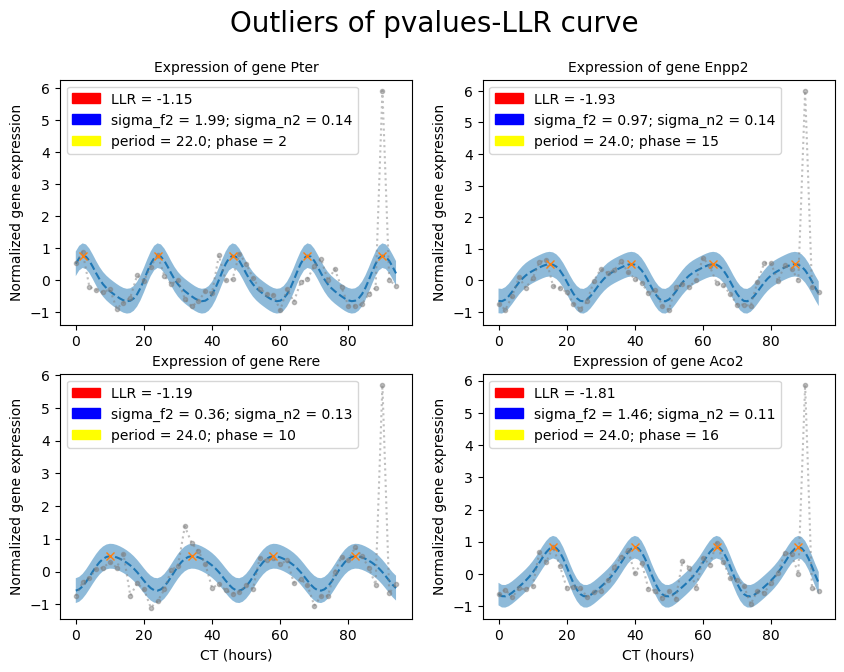

In [16]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from core import *
from scipy.signal import find_peaks

 #Pick an index
df = pd.read_csv('./06_XBP1_result/WT/GP_result_WT.csv')
df = df.iloc[:,1:]
plot = pd.read_csv('./06_XBP1_result/WT/plot_WT.csv')
plot = plot.iloc[:,1:]
data = pd.read_csv('./results/STAR/WT_arrange.csv')
out_dir = "./06_XBP1_result/WT/circadian_genes"
data_type ="WT"

index = [252,3440,1037,3508]

plt.figure(figsize=(10,7))

for x in range(4):
    plt.subplot(2,2,x+1)
    gene  = np.array(data.iloc[index[x],1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = plot['Period'][index[x]]
    param_GP.l = plot['Lengthscale'][index[x]]
    param_GP.sigma_f2 = plot['Var'][index[x]]
    param_GP.sigma_n2 = plot['Noise'][index[x]]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    mean_f = final_pse.cal_pred_mu(new_pse).detach().numpy().flatten()
    peaks, _ = find_peaks(mean_f, distance = param_GP.p.item())
    final_pse.plot_f_gp(new_pse)
    final_pse.plot_data()
    plt.plot(peaks, mean_f[peaks], "x")
    if x > 1:
        plt.xlabel("CT (hours)")
    plt.ylabel("Normalized gene expression")
    plt.title(f"Expression of gene {data.iloc[index[x],0]}",fontsize=10)
    red_patch = mpatches.Patch(color='red',label= f'LLR = {round(df.LLR[x],2)}')
    blue_patch = mpatches.Patch(color='blue', label= f'sigma_f2 = {round(param_GP.sigma_f2.item(),2)}; sigma_n2 = {round(param_GP.sigma_n2.item(),2)}')
    yellow_patch = mpatches.Patch(color='yellow', label = f'period = {param_GP.p.item()}; phase = {peaks[0]}')
    plt.legend(handles=[red_patch, blue_patch, yellow_patch])

plt.suptitle("Outliers of pvalues-LLR curve",fontsize=20)

#plt.savefig("Outliers_exp.png")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from core import *
from scipy.signal import find_peaks

 #Pick an index
df = pd.read_csv('./06_XBP1_result/WT/GP_result_WT.csv')
df = df.iloc[:,1:]
plot = pd.read_csv('./06_XBP1_result/WT/plot_WT.csv')
plot = plot.iloc[:,1:]
data = pd.read_csv('./results/STAR/WT_arrange.csv')
out_dir = "./06_XBP1_result/WT/circadian_genes"
data_type ="WT"

for x in plt_index: 
    gene  = np.array(data.iloc[x,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_null = Parameters()
    param_null.p = plot['Period_null'][x]
    param_null.l = plot['Lengthscale_null'][x]
    param_null.sigma_f2 = plot['Var_null'][x]
    param_null.sigma_n2 = plot['Noise_null'][x]

    param_GP = Parameters()
    param_GP.p = plot['Period'][x]
    param_GP.l = plot['Lengthscale'][x]
    param_GP.sigma_f2 = plot['Var'][x]
    param_GP.sigma_n2 = plot['Noise'][x]


    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_null, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_null, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse)
    final_pse.plot_data()
    plt.xlabel("ZT (hours)")
    plt.ylabel("Normalized gene expression")
    plt.title("Null model of GP")


    plt.subplot(1, 2, 2)
    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    mean_f = final_pse.cal_pred_mu(new_pse).detach().numpy().flatten()
    peaks, _ = find_peaks(mean_f, distance = param_GP.p.item())
    final_pse.plot_f_gp(new_pse)
    final_pse.plot_data()
    plt.plot(peaks, mean_f[peaks], "x")
    plt.xlabel("ZT (hours)")
    plt.ylabel("Normalized gene expression")
    plt.title("Circadian detection model with GP")

    plt.suptitle(f"Expression of gene {data.iloc[x,0]}",fontsize=20)
    red_patch = mpatches.Patch(color='red',label= f'LLR = {round(df.LLR[x],2)}')
    blue_patch = mpatches.Patch(color='blue', label= f'sigma_f2 = {round(param_GP.sigma_f2.item(),2)}; sigma_n2 = {round(param_GP.sigma_n2.item(),2)}')
    yellow_patch = mpatches.Patch(color='yellow', label = f'period = {param_GP.p.item()}; phase = {peaks[0]}')
    plt.legend(handles=[red_patch, blue_patch, yellow_patch])
    plt.show()
    #plt.savefig(f"{out_dir}/gene{x}_{data_type}.png")

print("done")

In [ ]:
# Outlier fom the fit
index_1 = np.where(np.log(RAIN_WT['pVal']) < -20)[0]
index_2 = WT[WT['LLR'] < -1].index.values

plt_index = [value for value in index_1 if value in index_2]
#plt_index

In [ ]:
for x in plt_index: 
    gene  = np.array(data.iloc[x,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_null = Parameters()
    param_null.p = plot['Period_null'][x]
    param_null.l = plot['Lengthscale_null'][x]
    param_null.sigma_f2 = plot['Var_null'][x]
    param_null.sigma_n2 = plot['Noise_null'][x]

    param_GP = Parameters()
    param_GP.p = plot['Period'][x]
    param_GP.l = plot['Lengthscale'][x]
    param_GP.sigma_f2 = plot['Var'][x]
    param_GP.sigma_n2 = plot['Noise'][x]


    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_null, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_null, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse)
    final_pse.plot_data()
    plt.xlabel("ZT (hours)")
    plt.ylabel("Normalized gene expression")
    plt.title("Null model of GP")


    plt.subplot(1, 2, 2)
    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    mean_f = final_pse.cal_pred_mu(new_pse).detach().numpy().flatten()
    peaks, _ = find_peaks(mean_f, distance = param_GP.p.item())
    final_pse.plot_f_gp(new_pse)
    final_pse.plot_data()
    plt.plot(peaks, mean_f[peaks], "x")
    plt.xlabel("ZT (hours)")
    plt.ylabel("Normalized gene expression")
    plt.title("Circadian detection model with GP")

    plt.suptitle(f"Expression of gene {data.iloc[x,0]}",fontsize=20)
    red_patch = mpatches.Patch(color='red',label= f'LLR = {round(df.LLR[x],2)}')
    blue_patch = mpatches.Patch(color='blue', label= f'sigma_f2 = {round(param_GP.sigma_f2.item(),2)}; sigma_n2 = {round(param_GP.sigma_n2.item(),2)}')
    yellow_patch = mpatches.Patch(color='yellow', label = f'period = {param_GP.p.item()}; phase = {peaks[0]}')
    plt.legend(handles=[red_patch, blue_patch, yellow_patch])
    plt.show()
    #plt.savefig(f"{out_dir}/gene{x}_{data_type}.png")

print("done")

In [20]:
n_results = pd.read_csv('./04_Simulated_result/GP/GP_Criteria_1.csv')
n_results = n_results.iloc[:,1:]
n_results

,Period,SNR,nSNR,LLR,0
0,20.0,4.003015,2.001507,-1.612209,Non-circadian
1,18.0,1.713571,0.856785,-0.998823,Non-circadian
2,24.0,7.206358,2.612281,1.396313,Circadian
3,20.0,2.484985,1.077117,-1.074589,Non-circadian
4,24.0,3.418823,1.233576,0.738312,Circadian
...,...,...,...,...,...
195,20.0,1.585557,0.671242,-1.813082,Non-circadian
196,16.0,1.414794,0.707397,-1.394684,Non-circadian
197,24.0,6.209997,2.646945,0.965695,Circadian
198,22.0,1.376489,0.542946,-1.332465,Non-circadian


In [43]:
n_results[(n_results['Period'] != 24) &  (n_results['0'] == 'Circadian')]

,Period,SNR,nSNR,LLR,0
23,22.0,2.893096,1.255272,-0.283996,Circadian
40,12.0,2.344894,1.172447,-0.066116,Circadian
64,12.0,1.751632,0.875816,-0.420495,Circadian
68,22.0,3.389182,1.418243,-0.659263,Circadian
131,12.0,3.521177,1.760588,-0.279111,Circadian
184,12.0,3.315631,1.657816,-0.269174,Circadian


In [48]:
# Test with LLR first:
threshold = np.arange(start = n_results['LLR'].min(), stop =  n_results['LLR'].max(), step = 0.01)
#cnd = list(s_results['0'])
#cnd = [int(u in 'Circadian') for u in cnd]
precision = []
recall = []
F1 = []
for x in threshold:
    llr = list(n_results['LLR'])
    A_R = [int(u > x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for j in range(len(n_results)):
        if (n_results['Period'][j] == 24) & (n_results['0'][j] == 'Circadian'):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(n_results)):
        if (n_results['Period'][j] == 24) & (n_results['0'][j] == 'Non-circadian'):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(n_results)):
        if (n_results['Period'][j] != 24) & (n_results['0'][j] == 'Circadian'):
            if A_R[j] == 1:
                FN += 1
    for j in range(len(n_results)):
        if (n_results['Period'][j] == 24) & (n_results['0'][j] == 'Circadian'):
            if A_R[j] != 1:
                FN += 1

    precision.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))


for z in range(len(precision)):
    F1.append(2*(precision[z]*recall[z])/(precision[z]+recall[z]))

In [60]:
threshold[np.argmax(F1)]

-0.6355181757609039

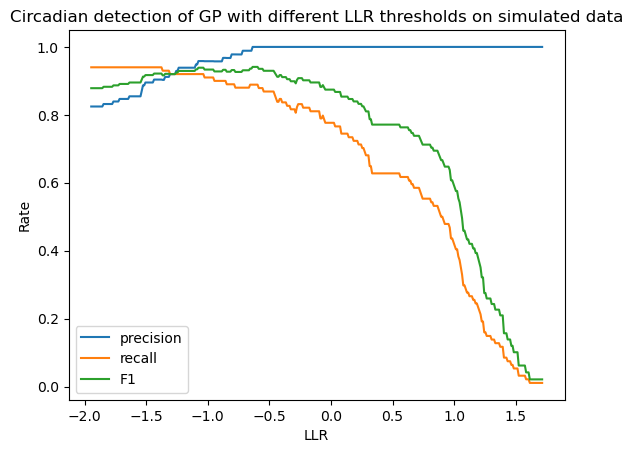

In [51]:
plt.plot(threshold,precision,label ='precision')
plt.plot(threshold,recall,label ='recall')
plt.plot(threshold,F1,label ='F1')
plt.legend()
plt.xlabel("LLR")
plt.ylabel("Rate")
plt.title("Circadian detection of GP with different LLR thresholds on simulated data")
#plt.savefig("LLR_threshold_metric.png")

In [4]:
# Different simulation criteria:
# Criteria 1
data_1 = pd.read_csv('./03_Simulated_data/Criteria_1.csv')
data_2 = pd.read_csv('./03_Simulated_data/Criteria_2.csv')
data_3 = pd.read_csv('./03_Simulated_data/Criteria_3.csv')

data_1

,0,0.1,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Non-circadian,0.698427,0.145982,-0.321536,-0.744002,0.907988,0.990725,-1.327865,1.206321,0.729379,...,2.874331,1.730081,-0.392666,0.340219,0.292838,-0.913142,1.496857,1.177789,-0.692149,0.082116
1,Non-circadian,1.538076,-1.320257,-1.401309,1.979303,1.469069,0.215204,-1.607450,-0.892984,0.554362,...,-1.259096,0.155472,-0.217155,-0.170437,-1.265765,-1.297492,0.106929,-0.113152,0.651740,-0.559266
2,Circadian,1.375091,0.892937,0.101587,-0.099923,-0.365982,0.007422,0.784729,1.217934,1.349354,...,0.672314,1.335933,1.317265,0.950328,0.167837,-0.156126,-0.224369,0.103352,0.653877,1.160225
3,Non-circadian,0.102710,0.640553,0.243032,0.606256,1.097210,-0.656465,-0.326142,1.111158,0.409028,...,0.874444,0.474235,-0.184441,-1.368100,-1.205063,-1.231111,0.222034,-0.606559,0.043739,0.601049
4,Circadian,-1.394646,-1.539807,-1.286475,-0.925445,-0.636454,-0.418173,-0.480084,-0.967405,-1.548445,...,-0.524271,-0.756836,-1.450183,-1.439650,-1.085895,-0.798013,-0.644736,-0.531221,-0.549226,-0.738286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Non-circadian,-0.420611,-1.394825,0.005328,-0.999545,0.253518,-0.383641,0.480564,-1.096179,-0.713135,...,-0.998255,0.477518,1.047134,-0.255304,0.185254,0.896976,0.296193,-0.179270,-1.307400,-1.794443
196,Non-circadian,-1.835192,-1.886382,0.065251,1.441141,1.262073,2.246916,0.667304,0.051029,1.770011,...,0.181153,0.092113,-0.261946,0.286028,-0.505748,0.209051,0.786396,-0.275569,-1.394349,-0.861169
197,Circadian,1.394238,1.058958,0.606189,0.053795,0.028985,-0.143373,0.097794,0.698026,1.546149,...,0.092440,1.186350,1.243787,1.061774,0.569971,0.061665,0.027264,-0.020866,0.217234,1.166428
198,Non-circadian,-0.152429,-0.285192,-1.061526,0.526646,-0.163487,1.930082,1.406169,2.229544,0.895971,...,0.243346,-0.499670,-0.481933,-0.099481,-0.776343,1.745337,1.767950,-0.909640,0.997420,-0.279933


In [5]:
np.arange(1,72,3)


array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70])

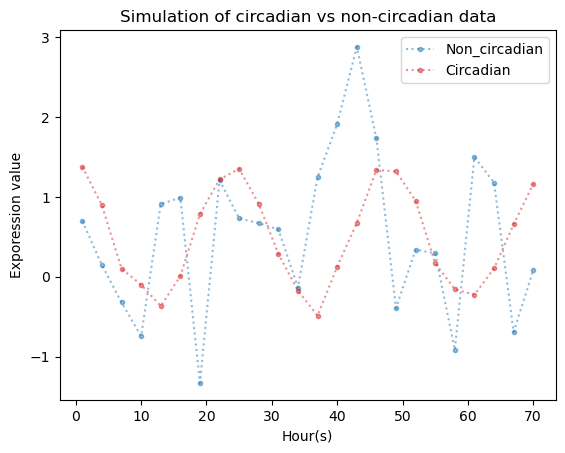

In [7]:
plt.plot(np.arange(1,72,3), data_1.iloc[0,1:], ':.', color='tab:blue', alpha=0.5, label = 'Non_circadian')
plt.plot(np.arange(1,72,3), data_1.iloc[2,1:], ':.', color='tab:red', alpha=0.5,label = 'Circadian')
plt.legend()
plt.xlabel("Hour(s)")
plt.ylabel("Exporession value")
plt.title("Simulation of circadian vs non-circadian data")
plt.savefig("Crit_1_data.png")

In [8]:
data_2[data_2['0'] == 24]

,0,0.1,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,24,0.093232,0.348284,0.574219,0.783641,1.262660,1.859973,1.415002,0.311462,0.067189,...,1.236264,0.360856,0.144324,0.349724,0.568516,0.682306,1.124561,1.930467,1.403666,0.272475
9,24,0.427362,0.274751,0.024349,0.521320,1.046397,0.863103,0.225843,0.298834,0.196002,...,0.380090,0.246860,0.474461,0.218164,-0.009245,0.452345,1.019343,0.750817,0.130203,0.275809
13,24,-1.207941,-1.410192,-1.152081,-0.807180,-0.738266,-0.858649,-0.744486,-0.866253,-1.253615,...,-0.798638,-1.017851,-1.116809,-1.446306,-1.149500,-0.835295,-0.615965,-0.732609,-0.869505,-1.039288
18,24,-0.570181,-0.308747,-0.265337,0.385878,0.172866,-0.156254,-0.363090,-0.663707,-0.611601,...,-0.438593,-0.596875,-0.467470,-0.245487,-0.129576,0.177750,0.115050,-0.186794,-0.735330,-0.654944
23,24,0.316109,0.452399,0.651953,1.054957,0.452247,-0.678244,-0.541252,-0.278728,0.153221,...,-0.716572,-0.448254,0.440951,0.315815,0.791490,1.077184,0.507278,-0.538447,-0.686707,-0.395914
30,24,2.053932,2.307985,1.544795,1.072621,1.067836,1.105194,1.107842,1.449855,2.064450,...,1.193801,1.353899,2.084299,2.298306,1.886004,1.211873,1.072286,1.257652,1.148236,1.369843
34,24,0.632549,0.497271,0.846168,0.973285,0.970303,0.955615,1.022019,0.641693,0.620072,...,1.145520,0.879784,0.771931,0.693487,0.605414,0.914689,0.731881,0.988495,1.070486,0.772626
38,24,0.594703,0.098663,0.069192,0.334626,0.922954,1.502293,1.922100,1.405946,0.712552,...,1.764775,1.306694,0.632422,0.256549,0.006477,0.264057,0.978601,1.559249,1.719401,1.523217
45,24,0.372637,-0.358849,-0.562643,-0.358590,0.124257,0.532659,0.731866,0.966855,0.515956,...,0.703465,0.833316,0.438823,-0.225667,-0.516976,-0.458840,-0.009518,0.428598,0.733458,0.921993
60,24,1.587479,1.138510,1.216233,1.051182,0.944600,1.179481,1.302253,1.545250,1.722910,...,1.099288,1.707167,1.614901,0.978721,1.097092,1.174583,1.132628,1.081048,1.592688,1.658044


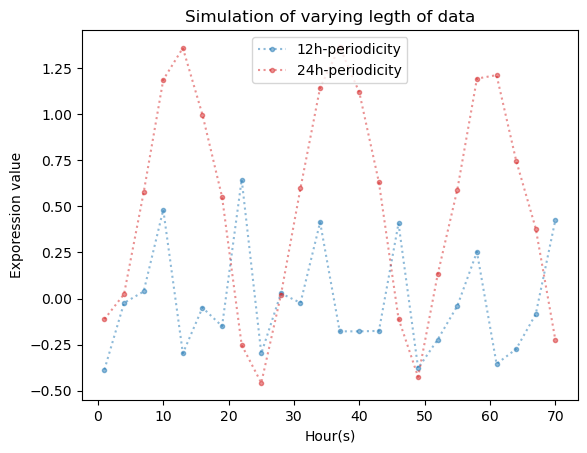

In [11]:
#Criteria 2
plt.plot(np.arange(1,72,3), data_2.iloc[67,1:], ':.', color='tab:blue', alpha=0.5, label = '12h-periodicity')
plt.plot(np.arange(1,72,3), data_2.iloc[128,1:], ':.', color='tab:red', alpha=0.5,label = '24h-periodicity')
plt.legend()
plt.xlabel("Hour(s)")
plt.ylabel("Exporession value")
plt.title("Simulation of varying legth of data")
plt.savefig("Crit_2_data.png")

In [13]:
data_3

,0,0.1,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0.0025,0.893026,1.255182,1.273792,1.145777,1.165499,0.855831,0.648901,0.692694,1.037218,...,0.607036,0.623443,0.799760,1.252119,1.271934,1.116719,1.081066,0.866324,0.574057,0.610190
1,0.0025,-0.241535,0.083742,-0.232327,-1.169578,-1.947107,-1.829176,-1.541316,-0.829941,-0.336577,...,-1.422945,-0.866923,-0.199505,0.093796,-0.212244,-1.148601,-1.906553,-1.941588,-1.445161,-0.898743
2,0.0025,-0.595427,-0.537128,-0.082548,0.482836,0.798494,0.786352,0.151233,-0.359809,-0.610096,...,0.202386,-0.401857,-0.600320,-0.500083,-0.038723,0.538623,0.916079,0.696521,0.147369,-0.218766
3,0.0025,1.379152,1.340047,0.778356,-0.030509,-0.238734,-0.079085,0.202358,0.821404,1.288666,...,0.280906,0.830756,1.265557,1.400060,0.841315,0.083627,-0.175866,-0.073525,0.224320,0.772601
4,0.0025,1.265411,0.750347,0.385523,0.075422,0.232167,1.098117,1.600881,1.497621,1.210216,...,1.508550,1.432094,1.258980,0.684677,0.414822,0.148164,0.300348,1.008838,1.557303,1.518738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.2500,1.294296,1.192752,0.926048,1.365272,-0.232605,-0.999992,0.569552,0.062645,0.556935,...,-0.172932,0.582592,0.280235,1.294320,1.180154,1.487643,0.569777,0.637663,-0.140378,0.324121
996,0.2500,-0.976015,0.339937,-0.018608,0.765695,0.084864,-0.983178,-0.761514,-0.857744,-1.542642,...,-1.722907,-1.603774,-0.188550,0.533000,0.503166,0.142894,0.452203,-0.147176,-1.154810,-1.569452
997,0.2500,1.064547,0.976179,0.957617,-0.150902,0.485549,0.664455,-0.348293,0.574480,0.898286,...,0.418634,0.555886,0.679889,1.828284,0.993265,0.956138,1.778523,0.525991,0.196118,1.213844
998,0.2500,-0.245377,0.786367,0.679985,1.553223,0.251215,-0.298720,0.199393,1.016957,0.963598,...,0.215826,-0.321369,0.421748,0.613857,1.101053,0.267279,0.721016,0.811747,0.421500,0.746367


In [15]:
# Criteria 3:
data_3[data_3['0'] == 0.04]

,0,0.1,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
300,0.04,-0.077371,0.090675,0.133402,0.046903,-0.116028,-0.858824,-1.053377,-0.861142,-0.239089,...,-1.289984,-0.976595,-0.617974,0.235261,0.247327,0.409916,-0.148478,-0.855221,-1.368693,-0.856364
301,0.04,0.722600,1.112104,0.621815,0.372642,-0.276637,-0.000166,0.203113,0.753488,0.911481,...,0.101046,0.313598,1.269704,1.075903,0.587276,0.078745,0.050627,0.275420,-0.022973,0.444799
302,0.04,-1.689250,-1.263521,-0.647821,-0.004127,-0.122020,0.012865,-0.468976,-1.149898,-1.539539,...,-0.511244,-1.406905,-1.691423,-1.171447,-0.328202,-0.012878,0.140668,-0.175903,-0.860716,-1.124639
303,0.04,-0.249902,-0.651570,-0.446207,-0.500416,-0.205757,-0.278523,-0.553068,0.016254,0.139288,...,-0.079569,-0.353859,-0.129844,0.077748,-0.804331,-0.502699,-0.307692,-0.422204,-0.080542,0.161026
304,0.04,0.599033,0.566875,0.270655,0.148695,-0.113716,0.082002,0.042493,0.084829,0.505028,...,-0.067304,-0.110008,0.140307,0.280958,0.066767,0.035998,-0.308661,-0.039840,0.135642,0.225243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.04,1.125689,1.286457,0.398609,0.515691,0.515292,0.969374,1.671078,1.763547,1.200756,...,1.819530,1.602119,1.319541,1.083536,0.630255,0.519569,0.597645,1.281777,1.783896,1.036532
396,0.04,0.499567,0.499514,0.807169,0.370794,-0.045496,-0.060156,-0.005835,0.386348,0.832384,...,0.052547,0.020886,0.985813,0.981121,0.536473,0.349049,0.389634,0.269119,-0.150779,0.270165
397,0.04,-1.143938,-0.390871,0.175371,0.310951,-0.134354,-0.740901,-1.306296,-1.487132,-1.148122,...,-1.302029,-1.552470,-0.938067,-0.311675,0.613890,0.483890,-0.386073,-0.570550,-1.488682,-1.701354
398,0.04,-1.528337,-0.917658,-0.529956,0.193869,0.020355,0.227700,-0.372949,-0.814816,-1.201761,...,-0.705515,-1.449440,-1.359822,-0.853948,-0.522905,-0.113476,0.074440,0.133825,-0.400990,-1.135712


Text(0.5, 1.0, 'Simulation of signals with different noise level')

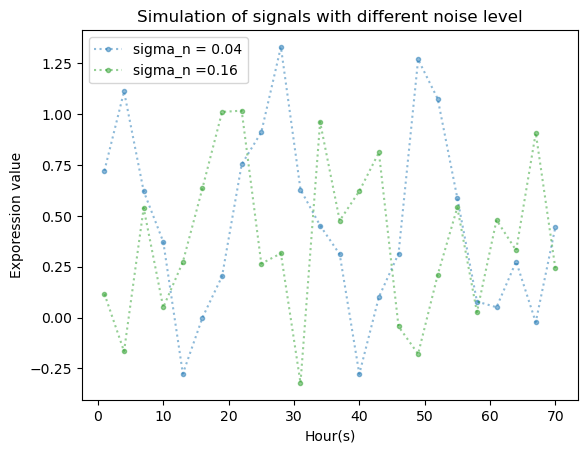

In [18]:
# Criteria 3
plt.plot(np.arange(1,72,3), data_3.iloc[301,1:], ':.', color='tab:blue', alpha=0.5, label = 'sigma_n = 0.04')
#plt.plot(np.arange(1,72,3), data_3.iloc[496,1:], ':.', color='tab:red', alpha=0.5,label = 'sigma_n2 =0.1')
plt.plot(np.arange(1,72,3), data_3.iloc[758,1:], ':.', color='tab:green', alpha=0.5,label = 'sigma_n =0.16')
plt.legend()
plt.xlabel("Hour(s)")
plt.ylabel("Exporession value")
plt.title("Simulation of signals with different noise level")
#plt.savefig("Crit_3_data.png")

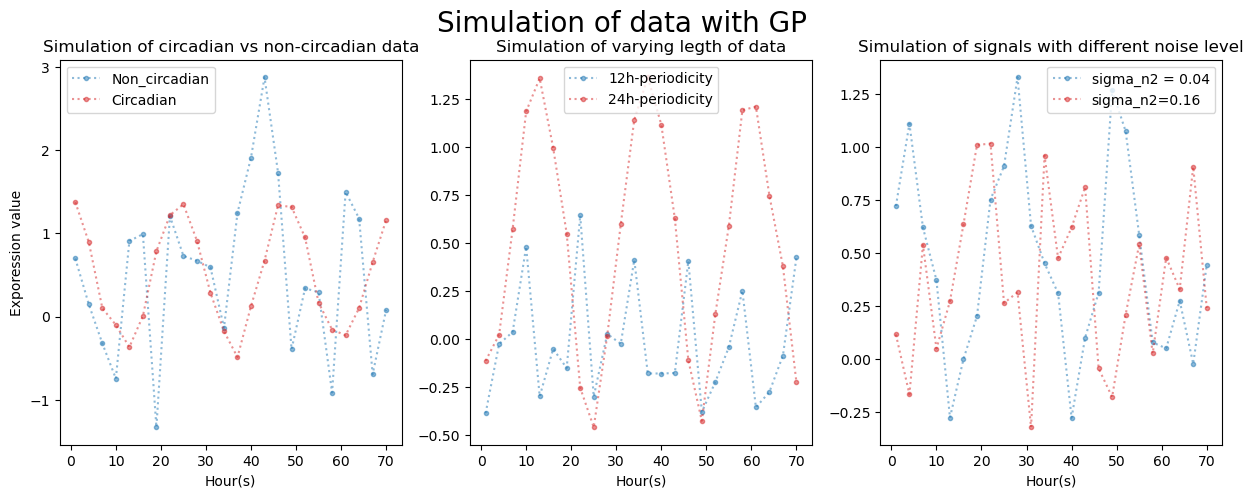

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.plot(np.arange(1,72,3), data_1.iloc[0,1:], ':.', color='tab:blue', alpha=0.5, label = 'Non_circadian')
plt.plot(np.arange(1,72,3), data_1.iloc[2,1:], ':.', color='tab:red', alpha=0.5,label = 'Circadian')
plt.legend()
plt.xlabel("Hour(s)")
plt.ylabel("Exporession value")
plt.title("Simulation of circadian vs non-circadian data")

plt.subplot(1, 3, 2)
plt.plot(np.arange(1,72,3), data_2.iloc[67,1:], ':.', color='tab:blue', alpha=0.5, label = '12h-periodicity')
plt.plot(np.arange(1,72,3), data_2.iloc[128,1:], ':.', color='tab:red', alpha=0.5,label = '24h-periodicity')
plt.legend()
plt.xlabel("Hour(s)")
plt.title("Simulation of varying legth of data")

plt.subplot(1, 3, 3)
plt.plot(np.arange(1,72,3), data_3.iloc[301,1:], ':.', color='tab:blue', alpha=0.5, label = 'sigma_n2 = 0.04')
#plt.plot(np.arange(1,72,3), data_3.iloc[496,1:], ':.', color='tab:red', alpha=0.5,label = 'sigma_n2 =0.1')
plt.plot(np.arange(1,72,3), data_3.iloc[758,1:], ':.', color='tab:red', alpha=0.5,label = 'sigma_n2=0.16')
plt.legend()
plt.xlabel("Hour(s)")
plt.title("Simulation of signals with different noise level")

plt.suptitle('Simulation of data with GP',fontsize=20)
plt.savefig("GP_Simulation_fixed.png")